In [305]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno


1. Problem definition
2. Data collection
3. Data cleaning & Preprocessing
4. Exploratory Data Analysis
5.Model training
6. Hyperparamere tuning
7. Error analysis
8. Model evaluation

In [306]:
#Load the data
train=pd.read_csv(r'C:\Users\Work\Desktop\Supervised_Machine_Learning\train.csv')
test=pd.read_csv(r'C:\Users\Work\Desktop\Supervised_Machine_Learning\test.csv')

In [307]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


**Data Cleaning and Preprocessing**

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [309]:
train.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [310]:
train.columns[train.isnull().sum()>0]

Index([], dtype='object')

In [311]:
#check for duplicates
all_duplicates=train.duplicated()
print(all_duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
15284    False
15285    False
15286    False
15287    False
15288    False
Length: 15289, dtype: bool


In [312]:
#correct the inconsistencies in column names
train.columns=train.columns.str.lower()

In [313]:
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


**Exploratory Data Analysis**

The essence is to explore/investigate the relationship of the independent features with the dependent features and the relationship of the independent features amongst themselves.

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

**Univariate Analysis**

1. What is the distribution of the yield in the dataset?

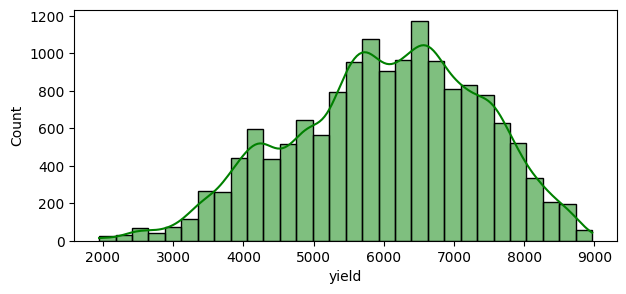

In [314]:
plt.figure(figsize=(7,3))

sns.histplot(train['yield'],kde=True,bins=30,color='green')



plt.show()

In [315]:
# Descriptive statistics
print(train['yield'].describe())

count    15289.000000
mean      6025.193999
std       1337.056850
min       1945.530610
25%       5128.163510
50%       6117.475900
75%       7019.694380
max       8969.401840
Name: yield, dtype: float64


In [316]:
print(f"\n2. Yield Statistics:")
print(f"Mean: {train['yield'].mean():.2f}")
print(f"Median: {train['yield'].median():.2f}")
print(f"Skewness: {train['yield'].skew():.3f}")


2. Yield Statistics:
Mean: 6025.19
Median: 6117.48
Skewness: -0.291


The yield distribution appears to be normal with a slight left skew. The average yield is 6025.19. Mean and median are close, suggesting a relatively symmetric distribution. The Standard deviation is 1337.05, indicating moderate variability in yield across different conditions. Some yields are very low eg. 1945.53, which could be due to:
- Poor pollination (low bee activity)
- Adverse weather (e.g., high raining days)
- Experimental or controlled low-yield scenarios

-The yield is likely influenced by various factors like:
- Bee activity (honeybee, bumbles, etc.)
- Temperature ranges (MaxOfUpperTRange, AverageOfLowerTRange, etc.)
- Rainfall (RainingDays, AverageRainingDays)
- Fruit set and seed count

In [317]:
train.drop('id',axis=1,inplace=True)

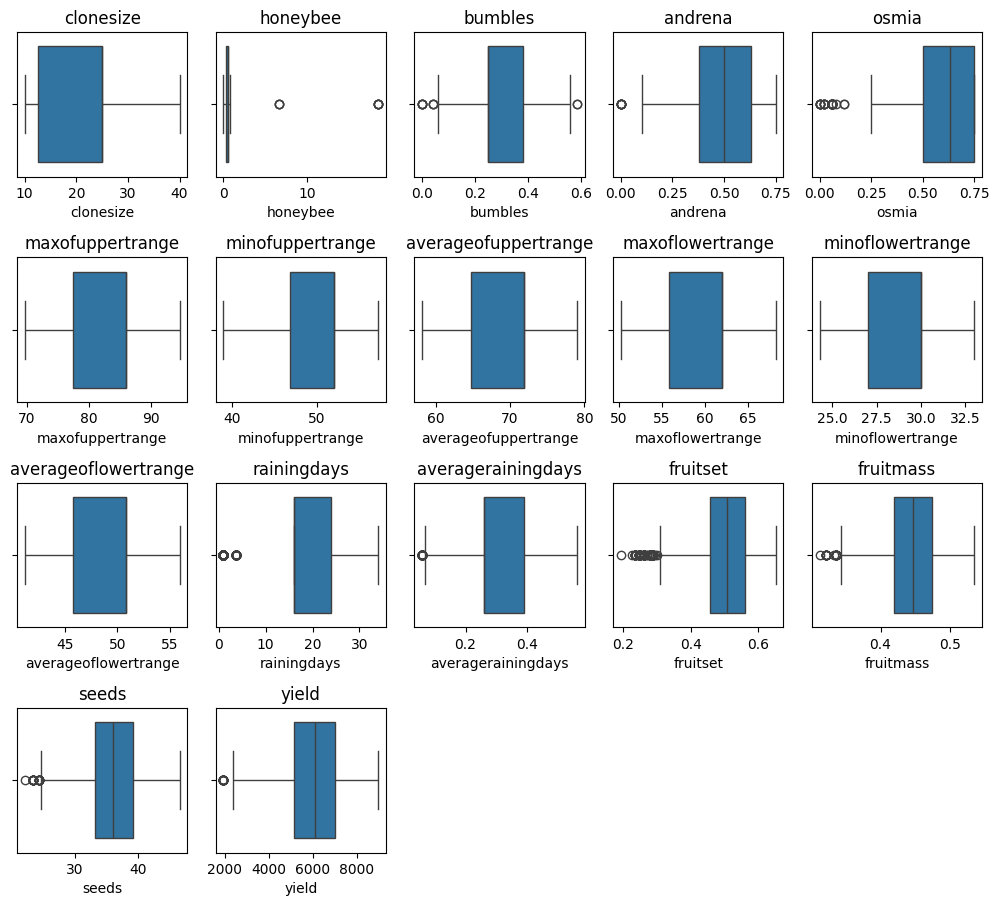

In [318]:
fig = plt.figure(figsize=(10,20))
for i in range(len(train.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.boxplot(x=train.iloc[:, i],ax=ax)
    ax.set_title(train.columns[i])
plt.tight_layout()
plt.show()

Lower outliers are more significant than the upper ones in yields. The lower outliers are however not extreme. There are no yields below 1945.53. The lower outliers indicate vulnerability to poor conditions. It appears plausible exhibiting expected crop behaviour

2. How do the different bees compare in density?


In [319]:
bee_cols=['honeybee','bumbles','andrena','osmia']
df_long=train.melt(value_vars=bee_cols,
                   var_name='bee_species',
                   value_name='density')
df_long.head()

,bee_species,density
0,honeybee,0.50
1,honeybee,0.50
2,honeybee,0.25
3,honeybee,0.25
4,honeybee,0.50


In [320]:
ranking = df_long.groupby('bee_species')['density'].mean().sort_values(ascending=False)
print("Average Density Ranking:", ranking.round(3))

Average Density Ranking: bee_species
osmia       0.592
andrena     0.493
honeybee    0.389
bumbles     0.287
Name: density, dtype: float64


In [321]:
ranking = df_long.groupby('bee_species')['density'].median().sort_values(ascending=False)
print("Median Ranking:", ranking.round(3))

Median Ranking: bee_species
osmia       0.63
andrena     0.50
honeybee    0.50
bumbles     0.25
Name: density, dtype: float64


In [322]:
ranking = df_long.groupby('bee_species')['density'].skew().sort_values(ascending=False)
print("Skewness Ranking:", ranking.round(3))

Skewness Ranking: bee_species
honeybee    41.613
bumbles      0.816
andrena      0.162
osmia       -0.845
Name: density, dtype: float64


**Osmia bees are the most abundant pollinators- Elite Performers**
- Highest average density: 0.592 (59.2%)
- Highest median: 0.63
- Left-skewed distribution: -0.845 skew

**Andrena bees come in second- Steady Workers**
- Good density: 0.493 (49.3%)
- Balanced distribution: Near-zero skew (0.162) - very normal distribution
- Consistent performer: Median of 0.50 matches mean well

**Honeybees take the 3rd place- Valuable Contributors**
- Density: : 0.389 density (38.9%)
- Extreme right skew: 41.613
- Bimodal distribution: Mostly low with rare extreme high values    

**Bumble Bees are the Lowest- Outlier Dependent**
- Lowest density: 0.287 (28.7%)
- Right-skewed: 0.816 (moderate skew toward higher values)
- Median of 0.25: Half the observations are very low density

**The Honey Bee Skewness of 41.6 is extreme**

This indicates:
- Massive outliers - a few observations with extremely high honey bee density
- Most observations are very low - typical honey bee density is much lower than average
- Data quality check needed - such high skewness might indicate measurement issues

**Osmia Bee Pattern (-0.845 skew)**
- Consistently high densities - most observations cluster at the high end
- Reliable high performance - not dependent on rare outlier events
- True workhorse pollinators - consistently present at good levels

Osmia bees are the highest and most consistent density. They should be the primary pollination target. Investment should be geared towards Osmia bee habitats and conservation. Andrena bees could serve as excellent secondary pollinators. An evaluation may be needed for honey bee investment as it may not be delivering the expected density.

Honey bee data may need verification - skewness of 41.6 is extremely unusual. It will be important to ascertain the measurement errors in honey bee density recordings. 

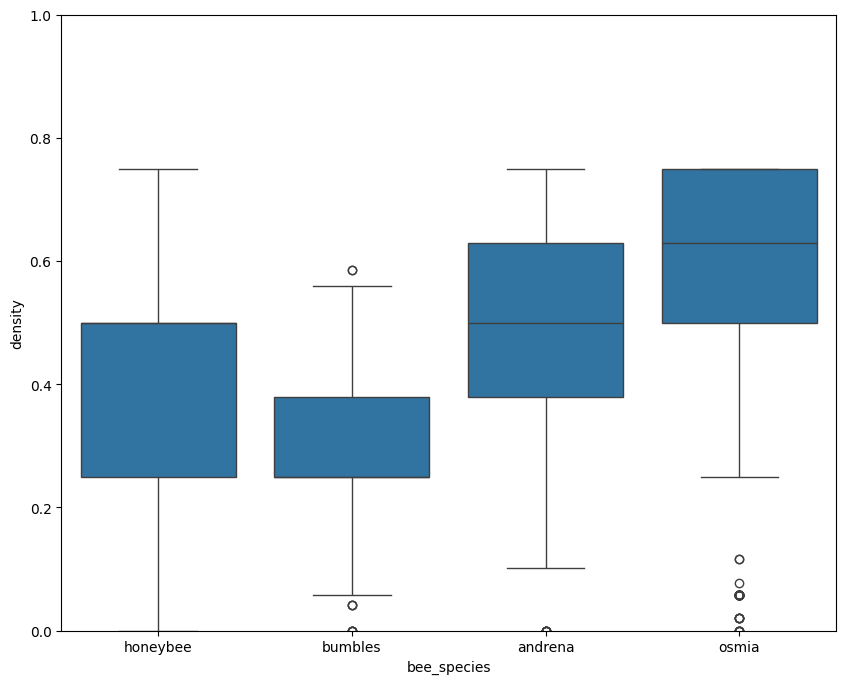

In [323]:
plt.figure(figsize=(10,8))

sns.boxplot(x='bee_species',y='density', data=df_long)
plt.ylim(0,1)



plt.show()

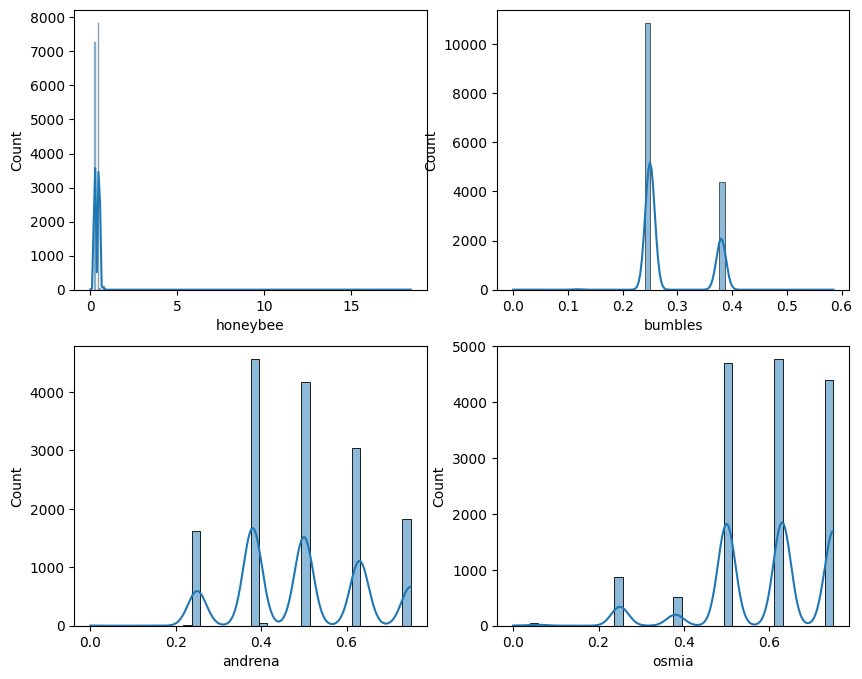

In [324]:
fig, ax=plt.subplots(nrows =2,ncols=2,figsize=(10,8))

sns.histplot(train['honeybee'],kde=True,ax=ax[0,0])
sns.histplot(train['bumbles'],kde=True,ax=ax[0,1])
sns.histplot(train['andrena'],kde=True,ax=ax[1,0])
sns.histplot(train['osmia'],kde=True,ax=ax[1,1])


plt.show()



